In [ ]:
!pip install nltk
!pip install numpy
!pip install pandas
!pip install textblob
!pip install scikit-learn
!pip install IPython
!pip install matplotlib
!pip install seaborn

In [ ]:
import re
import nltk
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import timedelta
from textblob import TextBlob 
from multiprocessing import Pool
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from IPython.display import display, HTML

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

In [34]:
df = pd.read_csv('data/dataset.csv')
df = df.rename(columns={'Review': 'review', 'Rating': 'rating'})

In [35]:
df.head(5)

,review,rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [42]:
def preprocess_text(text):
    # Convert to lowercase
    text = str(text).lower()
    
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Basic spell correction using TextBlob
    text = str(TextBlob(text).correct())
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Join tokens back to text
    return ' '.join(tokens)

def parallel_preprocess(texts, n_cores=10):
    total = len(texts)
    processed_texts = []
    
    print(f"Starting processing of {total} texts...")
    start_time = time.time()
    last_batch_time = start_time
    
    with Pool(n_cores) as pool:
        for i, result in enumerate(pool.imap(preprocess_text, texts)):
            processed_texts.append(result)
            if (i + 1) % 10 == 0:
                current_time = time.time()
                batch_time = current_time - last_batch_time
                total_time = current_time - start_time
                
                print(f"Processed {i + 1}/{total} texts ({((i + 1)/total)*100:.1f}%)")
                print(f"Batch time: {timedelta(seconds=batch_time)} - Total time so far: {timedelta(seconds=total_time)}")                                
                last_batch_time = current_time
    
    total_execution_time = time.time() - start_time
    print(f"Processing completed!")
    print(f"Total execution time: {timedelta(seconds=total_execution_time)}")
    return processed_texts

In [43]:
df['review'][0]

'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  '

In [44]:
preprocess_text(df['review'][0])

'nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews valet parking check quick easy little disappointed nonexistent view room room clean nice size bed comfortable woke stiff neck high pillows soundproof like heard music room night morning loud banks doors opening closing hear people talking halfway maybe noisy neighbors area bath products nice goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience pay parking night'

In [45]:
df['review'][2]

"nice rooms not 4* experience hotel monaco seattle good hotel n't 4* level.positives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized, missed 3 separate wakeup calls, concierge busy hard touch, did n't provide guidance special requests.tv hard use ipod sound dock suite non functioning. decided book mediterranean suite 3 night weekend stay 1st choice rest party filled, comparison w spent 45 night larger square footage room great soaking tub whirlpool jets nice shower.before stay hotel arrange car service price 53 tip reasonable driver waiting arrival.checkin easy downside room picked 2 person jacuzi tub no bath accessories salts bubble bath did n't stay, night got 12/1a checked voucher bottle champagne nice gesture fish waiting room, impression room huge open space felt room big, tv far away bed chore change channel, ipod dock broken disappointing.in morning way asked desk check thermostat said 6

In [46]:
preprocess_text(df['review'][2])

'nice rooms experience hotel monarch seattle good hotel levelpositives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized missed separate wake calls converge busy hard touch provide guidance special requests hard use upon sound dock suite non sanctioning decided book mediterranean suite night weekend stay st choice rest party filled comparison w spent night larger square forage room great soaking tub whirlpool jets nice showerbefore stay hotel arrange car service price tip reasonable driver waiting arrivalcheckin easy downside room picked person jacuzi tub bath accessories salts bubble bath stay night got checked voucher bottle champagne nice gesture fish waiting room impression room huge open space felt room big far away bed chose change channel upon dock broken disappointing morning way asked desk check thermostat said f degrees warm try cover face night bright blue light kept got room night st 

In [47]:
# 3. Apply preprocessing
n_samples = 100
df_subset = df.sample(n=n_samples, random_state=42)
df_subset['cleaned_review'] = parallel_preprocess(df_subset['review'])
print("Original shape:", df.shape)
print("Subset shape:", df_subset.shape)

Starting processing of 100 texts...
Processed 10/100 texts (10.0%)
Batch time: 0:00:14.561192 - Total time so far: 0:00:14.561192
Processed 20/100 texts (20.0%)
Batch time: 0:00:00.000228 - Total time so far: 0:00:14.561420
Processed 30/100 texts (30.0%)
Batch time: 0:00:00.000038 - Total time so far: 0:00:14.561459
Processed 40/100 texts (40.0%)
Batch time: 0:00:05.011069 - Total time so far: 0:00:19.572527
Processed 50/100 texts (50.0%)
Batch time: 0:00:00.000399 - Total time so far: 0:00:19.572926
Processed 60/100 texts (60.0%)
Batch time: 0:00:00.932569 - Total time so far: 0:00:20.505495
Processed 70/100 texts (70.0%)
Batch time: 0:00:00.000127 - Total time so far: 0:00:20.505622
Processed 80/100 texts (80.0%)
Batch time: 0:00:02.829498 - Total time so far: 0:00:23.335120
Processed 90/100 texts (90.0%)
Batch time: 0:00:02.913705 - Total time so far: 0:00:26.248825
Processed 100/100 texts (100.0%)
Batch time: 0:00:00.403162 - Total time so far: 0:00:26.651987
Processing completed!


In [49]:
df_subset.to_csv('data/cleaned_dataset.csv', index=False)
df_new = pd.read_csv('data/cleaned_dataset.csv')
df_new.head(5)

In [50]:
df['cleaned_review'] = parallel_preprocess(df['review'])

Starting processing of 20491 texts...
Processed 10/20491 texts (0.0%)
Batch time: 0:00:12.376339 - Total time so far: 0:00:12.376339
Processed 20/20491 texts (0.1%)
Batch time: 0:00:00.002724 - Total time so far: 0:00:12.379063
Processed 30/20491 texts (0.1%)
Batch time: 0:00:00.000048 - Total time so far: 0:00:12.379112
Processed 40/20491 texts (0.2%)
Batch time: 0:00:00.000041 - Total time so far: 0:00:12.379153
Processed 50/20491 texts (0.2%)
Batch time: 0:00:00.334375 - Total time so far: 0:00:12.713528
Processed 60/20491 texts (0.3%)
Batch time: 0:00:06.277315 - Total time so far: 0:00:18.990843
Processed 70/20491 texts (0.3%)
Batch time: 0:00:00.000118 - Total time so far: 0:00:18.990961
Processed 80/20491 texts (0.4%)
Batch time: 0:00:00.000040 - Total time so far: 0:00:18.991001
Processed 90/20491 texts (0.4%)
Batch time: 0:00:01.353529 - Total time so far: 0:00:20.344530
Processed 100/20491 texts (0.5%)
Batch time: 0:00:00.464880 - Total time so far: 0:00:20.809411
Processed 1

In [51]:
df.to_csv('data/cleaned_dataset_full.csv', index=False)

In [55]:
df.head(5)

,review,rating,cleaned_review
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms experience hotel monarch seattle go...
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monarch...
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...


In [54]:
print("Set shape:", df.shape)

Set shape: (20491, 3)


In [11]:

# 1. Simple side-by-side comparison
def show_comparison(original, cleaned, n_samples=5):
    comparison_df = pd.DataFrame({
        'Original Text': original,
        'Cleaned Text': cleaned
    })
    
    # Show random samples
    display(comparison_df.sample(n=n_samples))

# 2. Highlighting differences
def highlight_differences(text1, text2):
    """Highlight words that are different"""
    words1 = set(text1.split())
    words2 = set(text2.split())
    
    different_words = words1.symmetric_difference(words2)
    
    html = f"""
    <div style="display: flex; gap: 20px;">
        <div style="flex: 1;">
            <h4>Original:</h4>
            <p>{''.join([f'<span style="background-color: yellow">{w}</span> ' if w in different_words else f'{w} ' for w in text1.split()])}</p>
        </div>
        <div style="flex: 1;">
            <h4>Cleaned:</h4>
            <p>{''.join([f'<span style="background-color: yellow">{w}</span> ' if w in different_words else f'{w} ' for w in text2.split()])}</p>
        </div>
    </div>
    """
    return HTML(html)

In [57]:
highlight_differences(df['review'][20], df['cleaned_review'][20])

In [12]:
# 4. Create feature matrix using TF-IDF
tfidf = TfidfVectorizer(
    max_features=5000,  # Limit vocabulary size
    min_df=5,          # Minimum document frequency
    max_df=0.95        # Maximum document frequency
)

X = tfidf.fit_transform(df['cleaned_review'])
y = df['rating']

# 5. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. Train model
model = LogisticRegression(
    multi_class='multinomial',
    max_iter=1000
)
model.fit(X_train, y_train)

# 7. Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

NameError: name 'TfidfVectorizer' is not defined

/tmp/ipykernel_10968/1553188354.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', ax=ax1, palette='viridis')


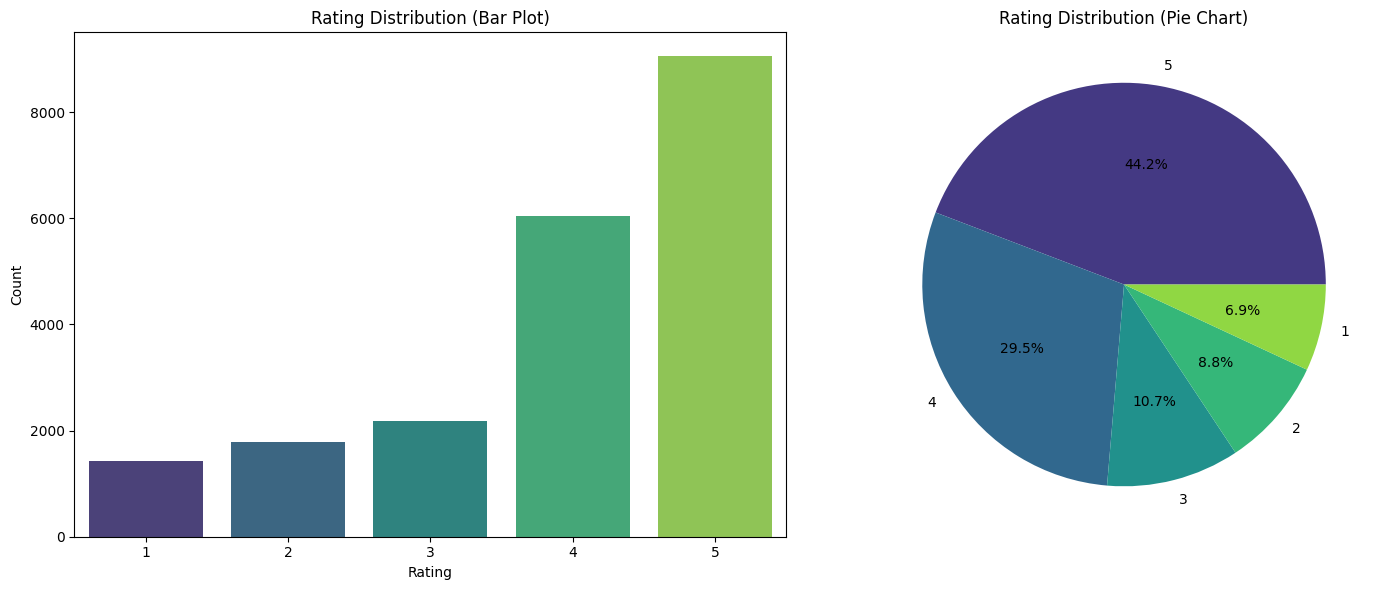


Numerical Summary:
rating
1    1421
2    1793
3    2184
4    6039
5    9054
Name: count, dtype: int64

Percentage Distribution:
rating
1     6.9
2     8.8
3    10.7
4    29.5
5    44.2
Name: proportion, dtype: float64


In [68]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 1. Bar plot with seaborn
sns.countplot(data=df, x='rating', ax=ax1, palette='viridis')
ax1.set_title('Rating Distribution (Bar Plot)')
ax1.set_xlabel('Rating')
ax1.set_ylabel('Count')

# 2. Pie chart with matplotlib
rating_counts = df['rating'].value_counts()
colors = sns.color_palette('viridis', n_colors=len(rating_counts))
ax2.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', colors=colors)
ax2.set_title('Rating Distribution (Pie Chart)')

# Adjust layout and display
plt.tight_layout()
plt.show()

# Print numerical summary
print("\nNumerical Summary:")
print(df['rating'].value_counts().sort_index())
print("\nPercentage Distribution:")
print(df['rating'].value_counts(normalize=True).sort_index().mul(100).round(1))